# Plot regions
Shapefile edits:
- Find missing DO_std=4 nodes and add them
- `SOG_Bellinghham` region to `SOG_NBays`
- `SFJAdmiralty` to `SJF_Admiralty`
- Attribute masked nodes?  Currently, masked nodes don't have DO_standard or Basin information

In [1]:
import sys
import os
sys.path.insert(1, '../scripts/')
import xarray
import openpyxl
import contextily as cx 
import yaml
import numpy as np
import pandas
import pathlib
import time
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
with open('../etc/SSM_config.yaml', 'r') as file:
    ssm = yaml.safe_load(file)
# get shapefile path    
shp = ssm['paths']['shapefile']
# load shapefile into geopandas dataframe
gdf = gpd.read_file(shp)
gdf.head(1)

,tce,node_id,x,y,lat,lon,DO_std,depth,km2,volume,basin_info,region_inf,included_i,Shape_Leng,Shape_Area,geometry
0,1067,1067,373307.0,5361464.0,48.393602,-124.711489,7,0.196173,7.9284,1.554706,other,SFJAdmiralty,1,19824.733294,1.796843e+07,"POLYGON ((-13882821.136 6172588.646, -13882751..."


In [3]:
ssm['paths']['shapefile']

'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/KingCounty-Rachael/kevin_shapefiles/SSMGrid2_07222022/SSMGrid2_tce_ecy_node_info_v2_07222022.shp'

In [4]:
do_std_df=gdf[['region_inf','node_id']].groupby('region_inf').count().rename(columns={'node_id':'Node Count'})
do_std_df

,Node Count
region_inf,
Hood,401
Main,893
Other,29
SFJAdmiralty,774
SOG_Bellinghham,488
SouthSound,1028
Whidbey,531


In [6]:
do_std_df=gdf[['DO_std','node_id']].groupby('DO_std').count()
do_std_df

,node_id
DO_std,
5,27
6,962
7,3155


In [7]:
do_std_df['Node Count'].sum()

KeyError: 'Node Count'

In [8]:
gdf=gdf.rename(columns={'region_inf':'Regions','node_id':'Node Count'}) 
regions_df=gdf[['Regions','Node Count']].groupby('Regions').count()

In [9]:
regions_df['Node Count'].sum()

4144

## Plot regions

In [10]:
regions=gdf[['Regions','Node Count']].groupby('Regions').count().index.to_list()
regions


['Hood',
 'Main',
 'Other',
 'SFJAdmiralty',
 'SOG_Bellinghham',
 'SouthSound',
 'Whidbey']

In [12]:
ssm['region']['colors']['Other']='white'
ssm['region']['colors']['SFJAdmiralty']=ssm['region']['colors']['SFJAdmiralty']

In [13]:
import cartopy.crs as crs
from cartopy import crs as ccrs, feature as cfeature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


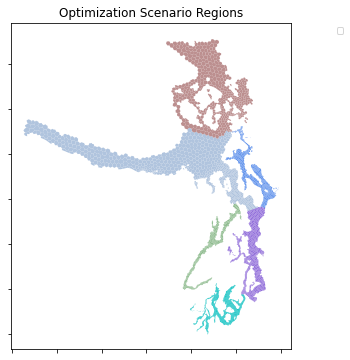

In [15]:
fig_title = f"Optimization Scenario Regions"
graphics_name = f"Regions.png"
# plot differences for each run
fig, axs = plt.subplots(1,1, figsize = (8,6))
for region in regions:
    gdf_region=gdf.loc[gdf['Regions']==region]
    gdf_region.plot(ax=axs, color=ssm['region']['colors'][region])
#axs.stock_img()
#axs.add_feature(cfeature.RIVERS)
#    cx.add_basemap(axs, crs=gdf.crs)  
axs.set_title(fig_title)
axs.set_xticklabels('')
axs.set_yticklabels('')

axs.legend(
    bbox_to_anchor=(1.2,1),
    loc='upper right'
    )

In [21]:
regions.remove("Other")

In [22]:
regions

['Hood', 'Main', 'SFJAdmiralty', 'SOG_Bellinghham', 'SouthSound', 'Whidbey']

/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Us

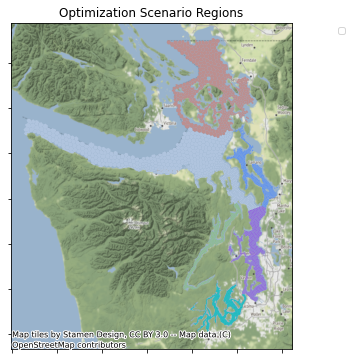

In [25]:
fig_title = f"Optimization Scenario Regions"
graphics_name = f"Regions.png"
# plot differences for each run
fig, axs = plt.subplots(1,1, figsize = (8,6))
for region in regions:
    gdf_region=gdf.loc[gdf['Regions']==region]
    gdf_region.plot('Regions',ax=axs, color=ssm['region']['colors'][region],
    legend=region)
cx.add_basemap(axs, crs=gdf.crs, alpha=1)  
axs.set_title(fig_title)
axs.set_xticklabels('')
axs.set_yticklabels('')

axs.legend(
    bbox_to_anchor=(1.2,1),
    loc='upper right'
    )

In [ ]:
gdf_region=gdf.loc[gdf['Regions']==region]

## Plot DO Standard

In [ ]:
DO_thresh = gdf['DO_std']
DO_thresh.shape

In [ ]:
gdf[['Basin','node_id']].groupby('Basin').count().rename(index={'Basin':'Regions'}).index.to_list()

In [ ]:
fig_title = f"DO Standard used to define Anoxic threshold"
graphics_name = f"DO_std.png"
# plot differences for each run
fig, axs = plt.subplots(1,1, figsize = (8,6))
gdf.plot('DO_std', ax=axs, legend=True,vmin=0,vmax=8,cmap='Dark2')
cx.add_basemap(axs, crs=gdf.crs,alpha=.5)   
# Zoom into Bbay so we can actualy see overlap
#axs.set_ylim(5.37e6,5.42e6)
#axs.set_xlim(5e5,5.4e5)
#xlabels=axs.get_xticklabels()
axs.set_title(fig_title)
axs.set_xticklabels('')
axs.set_yticklabels('')
# Get colourbar from second axis
colorbar = axs.get_figure().get_axes()[1]
colorbar.set_ylabel('days')
# plt.savefig(pathlib.Path(ssm['paths']['graphics'])/'AnoxDaysDiff'/graphics_name,
#             bbox_inches='tight',format='png')